In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
PLOTS_DIR = '../plots'

In [2]:
datafiles = [
             '../data/MTurk_anonymous.xlsx',
             '../data/DTU1_anonymous.xlsx',
             '../data/DTU2_anonymous.xlsx'
]

In [3]:
df_all = pd.DataFrame()
for datafile in datafiles:
    df = pd.DataFrame(pd.read_excel(datafile))
    df_all = df_all.append(df, sort=True)

In [4]:
df = df_all.groupby(['session', 'group', 'round'], as_index=False)[['arrival', 'choice']].agg(lambda x: np.mean(x))

In [5]:
df.head()

,session,group,round,arrival,choice
0,0c0pdasz,2,1,8.25,1.0
1,0c0pdasz,2,2,8.15,0.5
2,0c0pdasz,2,3,8.25,1.0
3,0c0pdasz,2,4,8.45,1.0
4,0c0pdasz,2,5,9.05,0.0


In [6]:
office = []
mis = []
canteen = []
for arrival in sorted(df.arrival.unique()):
    office.append(len([1 for i in df[df.arrival == arrival].choice.values if i == 0.]))
    mis.append(len([1 for i in df[df.arrival == arrival].choice.values if i == 0.5]))
    canteen.append(len([1 for i in df[df.arrival == arrival].choice.values if i == 1.]))
print(office, mis, canteen)

[3, 6, 9, 8, 41, 280, 362] [44, 31, 36, 62, 259, 257, 89] [403, 516, 547, 454, 266, 30, 13]


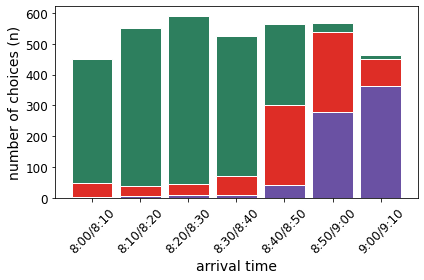

In [7]:
x = np.arange(7) # number of arrival times
barWidth = 0.85
names = ('8:00/8:10','8:10/8:20','8:20/8:30','8:30/8:40','8:40/8:50', '8:50/9:00', '9:00/9:10')
coord = np.add(office, mis).tolist()
plt.bar(x, office, color='#6a51a3', edgecolor='white', width=barWidth)
plt.bar(x, mis, bottom=office, color='#de2d26', edgecolor='white', width=barWidth)
plt.bar(x, canteen, bottom=coord, color='#2d7f5e', edgecolor='white', width=barWidth)
plt.xticks(x, names, fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.xlabel("arrival time", fontsize=14)
plt.ylabel("number of choices (n)", fontsize=14)
plt.tight_layout()

if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

plt.savefig(os.path.join(PLOTS_DIR, 'fig3_miscoordinations.png'),
            bbox_inches='tight', transparent=True, dpi=300)
plt.savefig(os.path.join(PLOTS_DIR, 'fig3_miscoordinations.pdf'), transparent=True, dpi=300)